# **Data Analysis Project: E-Commerce Public Dataset**

**Nama:** Namira Ra'ufa Dayyana

**Email:** naufayaa@gmail.com

**ID Dicoding:** naufaya

## **Business Problem**

1. Which customer segments contribute the most to the company’s revenue?
2. Which products or product categories generate the most revenue?

In [191]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 

import warnings
warnings.filterwarnings('ignore')

## **Data Wrangling**

### A. Gathering Data

In [192]:
df_cust = pd.read_csv('/Users/naufaya/Downloads/Submission/E-Commerce Public Dataset/customers_dataset.csv')
df_geoloc = pd.read_csv('/Users/naufaya/Downloads/Submission/E-Commerce Public Dataset/geolocation_dataset.csv')
df_or_items = pd.read_csv('/Users/naufaya/Downloads/Submission/E-Commerce Public Dataset/order_items_dataset.csv')
df_or_payments = pd.read_csv('/Users/naufaya/Downloads/Submission/E-Commerce Public Dataset/order_payments_dataset.csv')
df_or_reviews = pd.read_csv('/Users/naufaya/Downloads/Submission/E-Commerce Public Dataset/order_reviews_dataset.csv')
df_order = pd.read_csv('/Users/naufaya/Downloads/Submission/E-Commerce Public Dataset/orders_dataset.csv')
df_pro_cat = pd.read_csv('/Users/naufaya/Downloads/Submission/E-Commerce Public Dataset/product_category_name_translation.csv')
df_products = pd.read_csv('/Users/naufaya/Downloads/Submission/E-Commerce Public Dataset/products_dataset.csv')
df_sellers = pd.read_csv('/Users/naufaya/Downloads/Submission/E-Commerce Public Dataset/sellers_dataset.csv')

### B. Assesing Data

#### 1. Load Data

In [193]:
# Data Customer
df_cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [194]:
# Data Item Order
df_or_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [195]:
# Data Payment Order
df_or_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [196]:
# Data Review Order
df_or_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [197]:
# Data Status Order
df_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [198]:
# Data Product Name
df_pro_cat.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [199]:
# Data Product
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [200]:
# Data Seller
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [201]:
# df_geoloc.head()

Excluding location data helps reduce dataset size, improve processing speed, and manage storage constraints, especially when the data is not critical for analysis.

#### 2. Merged All Data

In [202]:
# Merging datasets for order-related data
df_merge_order = pd.merge(df_order, df_or_items, on='order_id', how='outer')
df_merge_order = pd.merge(df_merge_order, df_or_payments, on='order_id', how='outer')
df_merge_order = pd.merge(df_merge_order, df_or_reviews, on='order_id', how='outer')

# Merging datasets for product-related data
df_merge_product = pd.merge(df_products, df_pro_cat, on='product_category_name', how='outer')

# Merging customer and seller data
df = pd.merge(df_cust, df_merge_order, on='customer_id', how='outer')
df = pd.merge(df, df_merge_product, on='product_id', how='outer')
df = pd.merge(df, df_sellers, on='seller_id', how='outer')

#### 3. Missing Values & Duplicate

In [203]:
print(df.shape)
nilai_unique = df.apply(lambda x: x.unique())

info = pd.DataFrame({'type' : df.dtypes,
              'null' : df.isna().sum(),
              'unique' : df.nunique(),
              'duplicate' : df.duplicated().sum(),
              'nilai unique' : nilai_unique}
              )
info

(119143, 40)


,type,null,unique,duplicate,nilai unique
customer_id,object,0,99441,0,"[944b72539d7e1f7f7fc6e46639ef1fe3, d7fc82cbeaf..."
customer_unique_id,object,0,96096,0,"[3c7e305796add66698959fc7ad176f6b, 9de5797cddb..."
customer_zip_code_prefix,int64,0,14994,0,"[87502, 35490, 38600, 24710, 81530, 44670, 489..."
customer_city,object,0,4119,0,"[umuarama, entre rios de minas, paracatu, sao ..."
customer_state,object,0,27,0,"[PR, MG, RJ, BA, SC, RS, SP, CE, SE, ES, PE, R..."
order_id,object,0,99441,0,"[d455a8cb295653b55abda06d434ab492, 7f39ba4c905..."
order_status,object,0,8,0,"[delivered, shipped, canceled, processing, inv..."
order_purchase_timestamp,object,0,98875,0,"[2017-09-26 22:17:05, 2017-10-18 08:16:34, 201..."
order_approved_at,object,177,90733,0,"[2017-09-27 22:24:16, 2017-10-18 23:56:20, 201..."
order_delivered_carrier_date,object,2086,81018,0,"[2017-09-29 15:53:03, 2017-10-20 14:29:01, 201..."


In [204]:
# View Percentage of Missing Values
missing_percent = df.isnull().sum() / len(df) * 100
print("Missing Data Percentage:")
missing_percent.sort_values(ascending=False)

Missing Data Percentage:


review_comment_title             88.258647
review_comment_message           57.827988
order_delivered_customer_date     2.871339
product_category_name_english     2.154554
product_description_lenght        2.133571
product_name_lenght               2.133571
product_category_name             2.133571
product_photos_qty                2.133571
order_delivered_carrier_date      1.750837
review_id                         0.836810
review_answer_timestamp           0.836810
review_creation_date              0.836810
review_score                      0.836810
product_weight_g                  0.715946
product_length_cm                 0.715946
product_height_cm                 0.715946
product_width_cm                  0.715946
seller_state                      0.699160
freight_value                     0.699160
price                             0.699160
shipping_limit_date               0.699160
seller_id                         0.699160
order_item_id                     0.699160
seller_zip_

### C. Cleaning Data

#### Drop additional irrelevant columns

Reason : Drop columns that are not necessary for analysis, such as timestamps, irrelevant identifiers, product details, and review information.

In [205]:
# Dropping unnecessary columns
columns_to_drop = [
    'customer_zip_code_prefix', 'customer_state', 'order_approved_at',
    'order_delivered_carrier_date', 'order_delivered_customer_date', 
    'order_estimated_delivery_date', 'payment_sequential', 'payment_installments',
    'review_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date',
    'review_answer_timestamp', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty',
    'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'seller_id',
    'shipping_limit_date', 'seller_zip_code_prefix', 'seller_city', 'seller_state', 'product_category_name'
]

df.drop(columns=columns_to_drop, inplace=True)
df.head()

,customer_id,customer_unique_id,customer_city,order_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,freight_value,payment_type,payment_value,product_category_name_english
0,944b72539d7e1f7f7fc6e46639ef1fe3,3c7e305796add66698959fc7ad176f6b,umuarama,d455a8cb295653b55abda06d434ab492,delivered,2017-09-26 22:17:05,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,895.0,21.02,credit_card,916.02,small_appliances
1,d7fc82cbeafea77bd0a8fbbf6296e387,9de5797cddb92598755a0f76383ddbbb,entre rios de minas,7f39ba4c9052be115350065d07583cac,delivered,2017-10-18 08:16:34,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,895.0,21.02,credit_card,916.02,small_appliances
2,d9442164acf4b03109425633efaa0cfc,9915eb9f74b6c11aaf04833f65b00e93,paracatu,9dc8d1a6f16f1b89874c29c9d8d30447,delivered,2017-10-12 13:33:22,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,895.0,21.02,credit_card,916.02,small_appliances
3,015faf9ec36eccd957c0f2782aab09a4,dce323533e45e74d215e0fe7fb114118,sao goncalo,0f548bd29148ebc519d6495e37a284e1,delivered,2017-09-03 08:06:30,1.0,08574b074924071f4e201e151b152b4e,99.0,33.08,credit_card,264.16,garden_tools
4,015faf9ec36eccd957c0f2782aab09a4,dce323533e45e74d215e0fe7fb114118,sao goncalo,0f548bd29148ebc519d6495e37a284e1,delivered,2017-09-03 08:06:30,2.0,08574b074924071f4e201e151b152b4e,99.0,33.08,credit_card,264.16,garden_tools


In [206]:
# Convert 'order_purchase_timestamp' to datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

In [207]:
df.drop_duplicates(inplace=True)

In [208]:
df.dropna(inplace=True)

Missing values can distort analysis. Removing them ensures data consistency and prevents issues with calculations (e.g., sum, average). If missing values are few, removing rows is often simpler than imputing values.

## **Exploratory Data Analysis (EDA)**

### A. Data Info

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115221 entries, 0 to 118309
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    115221 non-null  object        
 1   customer_unique_id             115221 non-null  object        
 2   customer_city                  115221 non-null  object        
 3   order_id                       115221 non-null  object        
 4   order_status                   115221 non-null  object        
 5   order_purchase_timestamp       115221 non-null  datetime64[ns]
 6   order_item_id                  115221 non-null  float64       
 7   product_id                     115221 non-null  object        
 8   price                          115221 non-null  float64       
 9   freight_value                  115221 non-null  float64       
 10  payment_type                   115221 non-null  object        
 11  payme

In [210]:
df.describe()

,order_purchase_timestamp,order_item_id,price,freight_value,payment_value
count,115221,115221.000000,115221.000000,115221.000000,115221.000000
mean,2017-12-31 14:02:25.478506240,1.196336,120.905681,20.067362,173.810937
min,2016-09-04 21:15:19,1.000000,0.850000,0.000000,0.000000
25%,2017-09-12 20:15:05,1.000000,39.900000,13.080000,61.710000
50%,2018-01-19 15:05:34,1.000000,74.900000,16.320000,108.810000
75%,2018-05-04 20:19:38,1.000000,134.900000,21.220000,190.370000
max,2018-09-03 09:06:57,21.000000,6735.000000,409.680000,13664.080000
std,NaN,0.700165,184.206014,15.863256,268.634255


### C. Outliers Detection

In [211]:
# Detect outliers using IQR
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
outlier = []
no_outlier = []
is_outlier = []
low_lim = []
high_lim = []
percent_outlier = []

filtered_entries = np.array([True] * len(df))
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_bound = Q1 - (IQR * 1.5)
    high_bound = Q3 + (IQR * 1.5)

    filter_outlier = ((df[col] >= low_bound) & (df[col] <= high_bound))
    outlier_count = len(df[~filter_outlier])

    filtered_entries = ((df[col] >= low_bound) & (df[col] <= high_bound)) & filtered_entries

    outlier.append(outlier_count)
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_lim.append(low_bound)
    high_lim.append(high_bound)
    percent_outlier.append(round((outlier_count / len(df)) * 100, 2))

print("Outlier Summary:")
pd.DataFrame({
    "Column Name": numeric_columns,
    "is Outlier": is_outlier,
    "Lower bound": low_lim,
    "Upper bound": high_lim,
    "Outlier": outlier,
    "No Outlier": no_outlier,
    "Percent Outlier (%)": percent_outlier
})

Outlier Summary:


,Column Name,is Outlier,Lower bound,Upper bound,Outlier,No Outlier,Percent Outlier (%)
0,order_item_id,True,1.00,1.00,14258,100963,12.37
1,price,True,-102.60,277.40,8691,106530,7.54
2,freight_value,True,0.87,33.43,12433,102788,10.79
3,payment_value,True,-131.28,383.36,9324,105897,8.09


Outliers in the data reflect transactions with extremely high or low spending. Instead of removing them, they may indicate premium customers or significant one-time purchases. Further segmentation can help understand these patterns and create targeted marketing strategies.

## **Visualization & Explanatory Analysis**

In [212]:
def annotate_bars_x(plots):
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.0f'), 
                    (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                        size=7, xytext=(0, 8),
                        textcoords='offset points')

In [213]:
def annotate_bars_y(plots):
    for bar in plots.patches:
        plots.annotate(format(bar.get_width(), '.0f'), 
                       (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                       ha='center', va='center',
                       size=7, xytext=(8, 0),
                       textcoords='offset points')

Annotations display exact values on the chart, improving readability and making it easier to understand the data.

### Question 1: Which customer segments contribute the most to the company's revenue?

In [214]:
# Calculate total revenue by customer segment
df['revenue'] = df['payment_value']
df_revenue_by_customer = df.groupby('customer_id')['revenue'].sum().reset_index()
df_revenue_by_customer = df_revenue_by_customer.sort_values(by='revenue', ascending=False)
df_revenue_by_customer.head(10)

,customer_id,revenue
8379,1617b1357756262bfa56ab541c47bc16,109312.64
72272,bd5d39761aa56689a265d95d8d32b8be,45256.00
72526,be1b70680b9f9694d8c70f41fa3dc92b,44048.00
2023,05455dfa7cd02f13d132aa7a6a9729c6,36489.24
12171,1ff773612ab8934db89fd5afa8afe506,30186.00
89966,ec5b2ba62e574342386871631fafd3fc,29099.52
88267,e7d6802668de6e74d0d6c56565bf2a24,22346.60
53171,8c20d9bfbc96c5d39025d77a3ba83d7f,21874.05
94056,f7622098214b4634b7fe7eee269b5426,19457.04
43009,71901689c5f3e5adc27b1dd16b33f0b8,19174.38


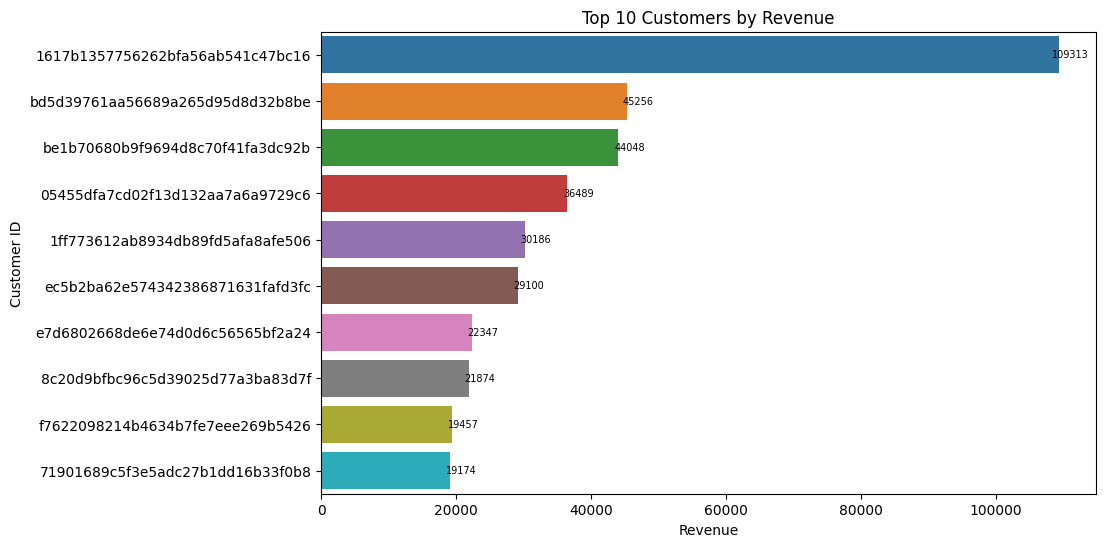

In [215]:
# Plot top 10 revenue-generating customers
plt.figure(figsize=(10, 6))
plot = sns.barplot(x='revenue', y='customer_id', palette='tab10', data=df_revenue_by_customer.head(10))
annotate_bars_y(plot)
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Customer ID')
plt.show()

**Insight: Top 10 Customers with the Highest Contribution**

1. Significant Contribution
    - The total revenue from the top 10 customers is $377,243.47, with the top 2 customers contributing approximately 40.9% of this total revenue.

2. High Dependency
    - The top customer (ID: 1617b1357756262bfa56ab541c47bc16) contributes $109,312.64, which is 28.9% of the total revenue from these 10 customers. This indicates a potential risk if this customer is lost.

3. Uneven Distribution
    - The revenue gap between the top customer and the 10th customer (ID: 71901689c5f3e5adc27b1dd16b33f0b8) is significant, with the 10th customer contributing $19,174.38, a difference of $90,138.26 compared to the top customer.

4. Strategic Opportunities
    - Analyze purchasing patterns of top-tier customers.
    - Implement loyalty programs tailored to retain them.
    - Diversify the customer base to reduce dependency on specific segments.

### Question 2: Which products or product categories are the best-selling and contribute the most to the revenue?

In [216]:
# Calculate total revenue by product category
df_revenue_by_product = df.groupby('product_category_name_english')['revenue'].sum().reset_index()
df_revenue_by_product = df_revenue_by_product.sort_values(by='revenue', ascending=False)
df_revenue_by_product.head(10)

,product_category_name_english,revenue
7,bed_bath_table,1709215.36
43,health_beauty,1655768.19
15,computers_accessories,1584762.72
39,furniture_decor,1428886.54
70,watches_gifts,1428302.46
65,sports_leisure,1391067.35
49,housewares,1093630.77
5,auto,851595.89
42,garden_tools,837279.96
20,cool_stuff,778767.89


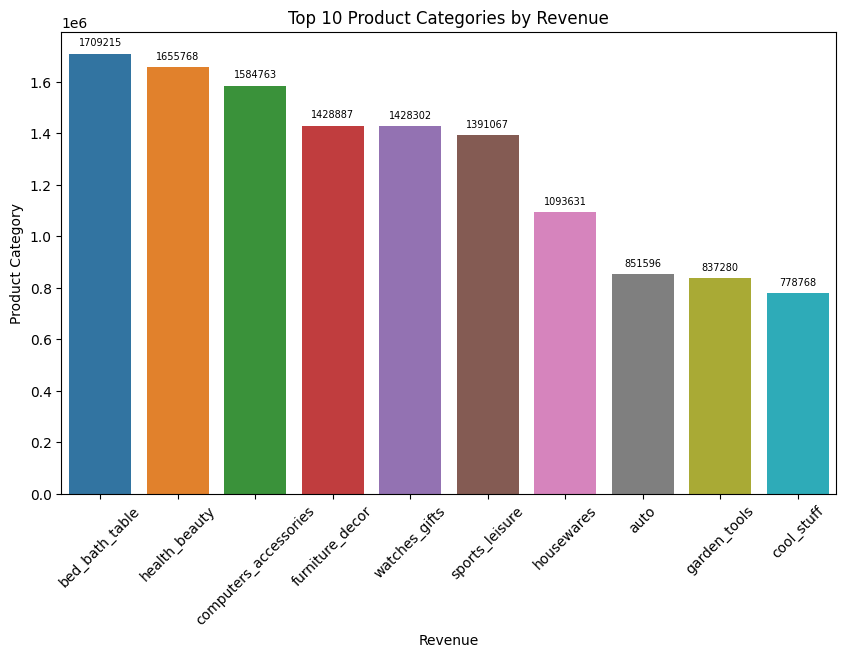

In [217]:
# Plot top 10 revenue-generating product categories
plt.figure(figsize=(10, 6))
plot = sns.barplot(y='revenue', x='product_category_name_english', palette='tab10', data=df_revenue_by_product.head(10))
annotate_bars_x(plot)
plt.title('Top 10 Product Categories by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product Category')
plt.xticks(rotation=45)
plt.show()

**Insight: Top 10 Product Categories**

1.	Key Contributors:
	- Top 10 categories generate $12,759,277.13 in revenue, with bed_bath_table has the highest revenue of $1,709,215.36,
    followed by health_beauty with $1,655,768.19.

2.	Moderate Performing Categories:
    - computers_accessories and furniture_decor show strong performance with revenues around $1.4M.

3.	Lower Performing Categories:
    - Categories like auto, garden_tools, and cool_stuff have lower revenues, under $900K.

### Analysis by City (Opsional)

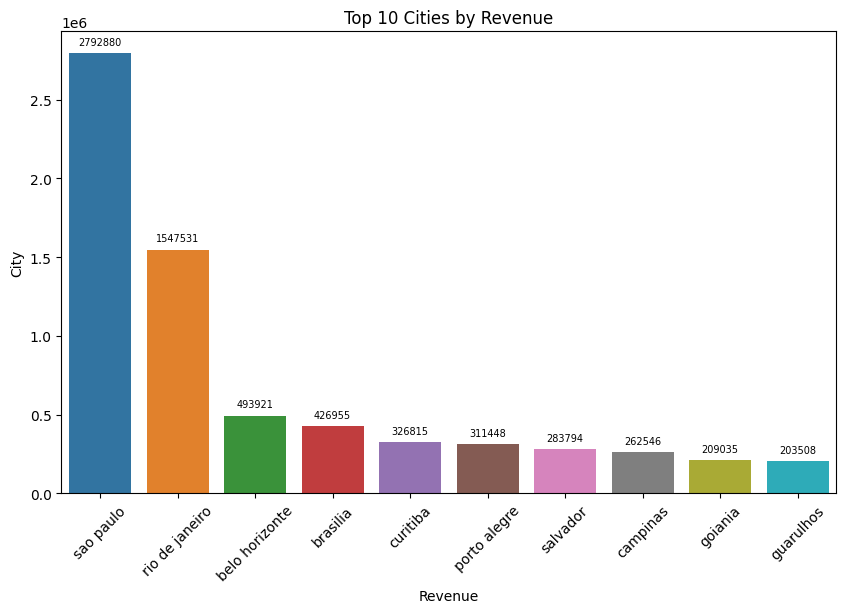

In [218]:
# Calculate total revenue by city
df_revenue_by_city = df.groupby('customer_city')['revenue'].sum().reset_index()
df_revenue_by_city = df_revenue_by_city.sort_values(by='revenue', ascending=False)

# Plot top 10 revenue-generating cities
plt.figure(figsize=(10, 6))
plot = sns.barplot(y='revenue', x='customer_city', palette='tab10', data=df_revenue_by_city.head(10))
annotate_bars_x(plot)
plt.title('Top 10 Cities by Revenue')
plt.xlabel('Revenue')
plt.ylabel('City')
plt.xticks(rotation=45)
plt.show()

**Insights: Top 10 Cities by Revenue**

1. Sao Paulo leads in revenue, with the highest sales at $2,792,880.28.
2. Rio de Janeiro follows with $1,547,530.53, also contributing significantly.
3. Other cities, such as Belo Horizonte ($493,920.81) and Brasilia ($426,955.18), show much lower revenues.
4. The revenue distribution indicates a strong market concentration in Sao Paulo and Rio de Janeiro.
5. The remaining cities show diminishing revenue levels, suggesting less business activity.

### RFM Analysis (Opsional)

#### 1. Calculate Recency

Recency refers to how recently a customer made a purchase. The idea is to measure how many days have passed since a customer’s last purchase.

In [220]:
# Recency: Calculate the number of days since the last purchase
max_date = df['order_purchase_timestamp'].max()
df['Recency'] = (max_date - df['order_purchase_timestamp']).dt.days

#### 2. Calculate Frequency
Frequency measures how often a customer makes a purchase. We count the number of orders made by each customer.

In [221]:
# Frequency: Calculate the number of orders made by each customer
df_freq = df.groupby('customer_id')['order_id'].count().reset_index()
df_freq.columns = ['customer_id', 'Frequency']

#### 3. Calculate Monetary
Monetary value measures how much money a customer spends. We calculate the total amount spent by each customer.

In [222]:
# Monetary: Calculate the total amount spent by each customer
df_monetary = df.groupby('customer_id')['revenue'].sum().reset_index()
df_monetary.columns = ['customer_id', 'Monetary']

#### 4. Merge Recency, Frequency, and Monetary Data

In [223]:
# Merge the three metrics into one DataFrame
df_rfm = pd.merge(df_freq, df_monetary, on='customer_id', how='left')
df_rfm = pd.merge(df_rfm, df[['customer_id', 'Recency']], on='customer_id', how='left')

df_rfm.head()

,customer_id,Frequency,Monetary,Recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,292
1,000161a058600d5901f007fab4c27140,1,67.41,413
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,551
3,0002414f95344307404f0ace7a26f1d5,1,179.35,382
4,000379cdec625522490c315e70c7a9fb,1,107.01,153


#### 5. Descriptive Statistics for Recency, Frequency, and Monetary

In [224]:
# View descriptive statistics for Recency, Frequency, and Monetary
df_rfm[['Recency', 'Frequency', 'Monetary']].describe()

,Recency,Frequency,Monetary
count,115221.000000,115221.000000,115221.000000
mean,245.150138,1.559585,350.593472
std,153.449141,1.686176,1586.796040
min,0.000000,1.000000,6.150000
25%,121.000000,1.000000,67.360000
50%,226.000000,1.000000,125.430000
75%,355.000000,2.000000,256.000000
max,728.000000,34.000000,109312.640000


This helps to understand the distribution and spread of each metric, identifying outliers and anomalies.

In [225]:
# View unique values for Frequency and Monetary
print(df_rfm['Frequency'].unique())
print(df_rfm['Monetary'].unique())

[ 1  4  2  3  6  5  7  8 10 12 11 15 34 16 20  9 24 14 13 22 25 19 17 21]
[114.74  67.41 195.42 ... 212.28 166.19  91.91]


#### 6. RFM Scoring
Assign scores to Recency, Frequency, and Monetary using different methods:

1. Recency Score: Quartile-based scoring (higher scores for more recent purchases).
2. Frequency Score: Log-transformation of Frequency to reduce skewed distribution.
3. Monetary Score: Log-transformation of Monetary value to normalize.

In [226]:
# Recency Score (quartile-based)
df_rfm['R_Score'] = pd.qcut(df_rfm['Recency'], q=4, labels=[4, 3, 2, 1])

# Log transformation for Frequency
df_rfm['Log_Frequency'] = np.log1p(df_rfm['Frequency'])

# Define custom bins for Frequency Score
bins = [0, 0.693, 1.098, 2.0, 3.555] 
labels = [1, 2, 3, 4]
df_rfm['F_Score'] = pd.cut(df_rfm['Log_Frequency'], bins=bins, labels=labels, include_lowest=True)

# Log transformation for Monetary
df_rfm['Log_Monetary'] = np.log1p(df_rfm['Monetary'])  # Apply log1p to reduce skew

# Monetary Score (quartile-based)
df_rfm['M_Score'] = pd.qcut(df_rfm['Log_Monetary'], q=4, labels=[1, 2, 3, 4])

Log transformation helps deal with skewed distributions, ensuring more even scoring. Quartile-based scoring ensures that customers are classified into distinct categories.

In [227]:
# Check for missing values in RFM Scores
df_rfm[['R_Score', 'F_Score', 'M_Score']].isna().sum()

R_Score     0
F_Score    34
M_Score     0
dtype: int64

In [228]:
# Drop rows with missing RFM scores
df_rfm = df_rfm.dropna(subset=['R_Score', 'F_Score', 'M_Score'])

In [229]:
# Calculate the total RFM Score
df_rfm['RFM_Score'] = df_rfm['R_Score'].astype(int) + df_rfm['F_Score'].astype(int) + df_rfm['M_Score'].astype(int)

# Define customer segments based on RFM Score
def segment_rfm(row):
    if row['RFM_Score'] >= 10:
        return 'Best Customers'
    elif row['R_Score'] == 1:
        return 'Lost Customers'
    elif row['F_Score'] == 1:
        return 'One-Time Buyers'
    elif row['M_Score'] == 1:
        return 'Low Spenders'
    else:
        return 'Others'

df_rfm['Segment'] = df_rfm.apply(segment_rfm, axis=1)

Segmentation helps identify groups of customers with similar behaviors. These segments can then be targeted with tailored marketing strategies.

Segment
Others            51181
Lost Customers    28631
Low Spenders      21531
Best Customers    13844
Name: count, dtype: int64


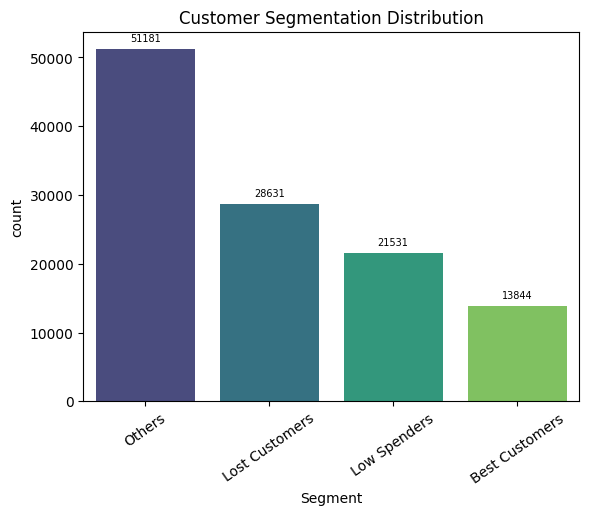

In [230]:
# View the distribution of segments
print(df_rfm['Segment'].value_counts())

# Bar plot for segment distribution
plot = sns.countplot(data=df_rfm, x='Segment', order=df_rfm['Segment'].value_counts().index, palette='viridis')
annotate_bars_x(plot)
plt.title('Customer Segmentation Distribution')
plt.xticks(rotation=35)
plt.show()

Insight:

1. `Others` is the largest segment, indicating a broad customer base.
2. `Best Customers` are the most valuable, followed by `Lost Customers` and `Low Spenders`, which could be targeted for re-engagement or upselling.

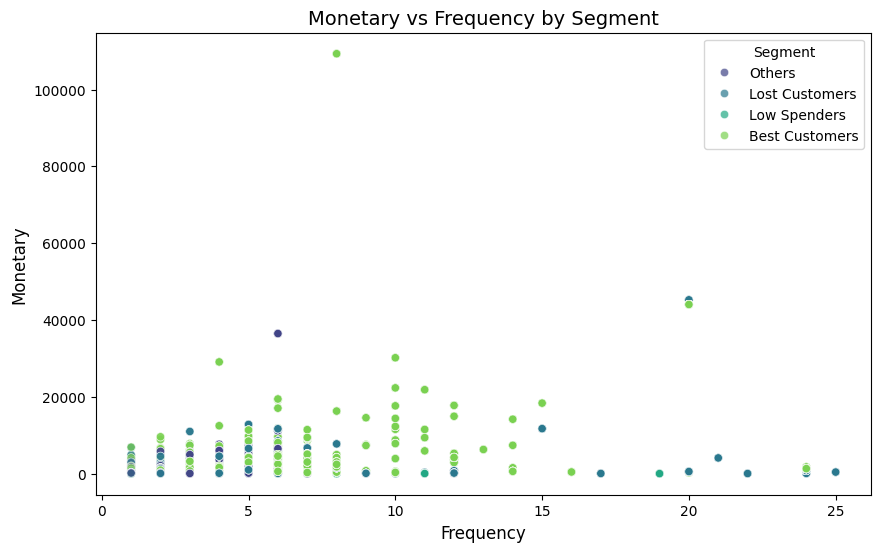

In [231]:
# Scatter plot for Monetary vs Frequency by Segment
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_rfm, x='Frequency', y='Monetary', hue='Segment', palette='viridis', alpha=0.7)
plt.title('Monetary vs Frequency by Segment', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Monetary', fontsize=12)
plt.legend(title='Segment', bbox_to_anchor=(1, 1))
plt.show()

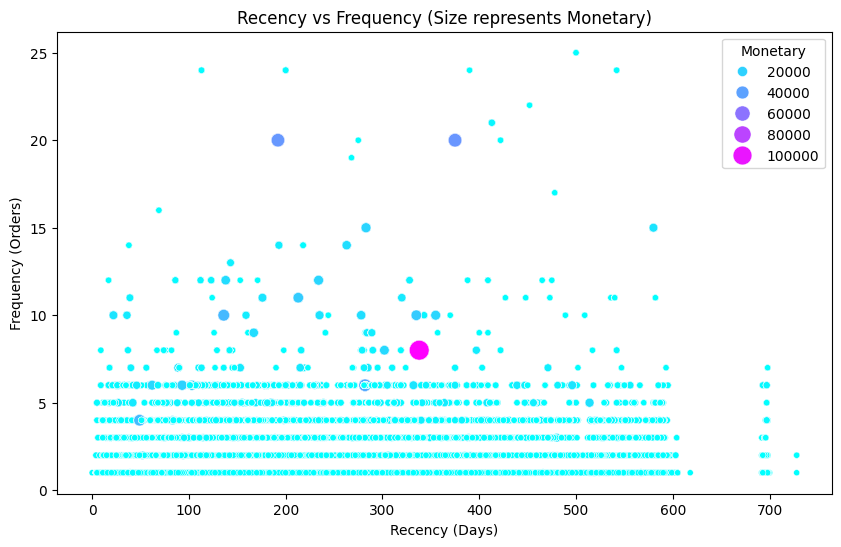

In [232]:
# Scatter plot for Recency vs Frequency (Size represents Monetary)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_rfm, x='Recency', y='Frequency', size='Monetary', hue='Monetary', palette='cool', sizes=(20, 200))
plt.title('Recency vs Frequency (Size represents Monetary)')
plt.xlabel('Recency (Days)')
plt.ylabel('Frequency (Orders)')
plt.legend(title='Monetary')
plt.show()

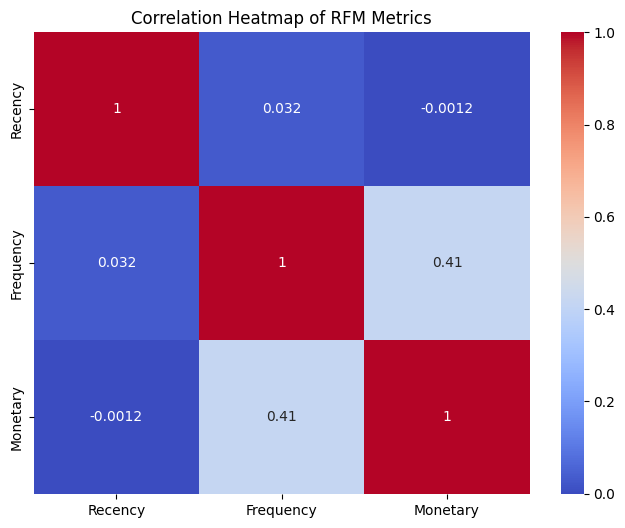

In [233]:
# Heatmap for correlation between RFM
plt.figure(figsize=(8, 6))
sns.heatmap(df_rfm[['Recency', 'Frequency', 'Monetary']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of RFM Metrics')
plt.show()

## **Conclusion**

1. Customer Segments Contribution:
    - A few customers account for a large portion of the revenue, highlighting the need to focus on retaining these key customers and diversifying the customer base.

2. Product Categories Contribution:
    - Categories like bed_bath_table and health_beauty generate the most revenue. Strategies should focus on promoting these categories while improving performance in underperforming ones.

3. City-Based Revenue Insights:
    - Large cities like Sao Paulo and Rio de Janeiro are major revenue sources. Targeted marketing in these cities and efforts to boost sales in smaller cities could further increase revenue.

4. RFM Analysis:
    - High-RFM customers are the most valuable. Tailored promotions for these customers can improve retention and conversion.

5. Outlier Analysis:
    - Unusually high-value purchases suggest premium customers. Understanding these patterns could lead to targeted strategies for high-value buyers.

## **Recommendations:**

1. Retain high-value customers with loyalty programs.
2. Focus on boosting sales in underperforming product categories.
3. Target marketing efforts in high-revenue cities and explore new markets in smaller cities.
4. Analyze and develop strategies for premium buyers based on outlier patterns.

In [234]:
# df.to_csv('e-commerce dataset.csv')

In [235]:
# df_rfm.to_csv('rfm_analysis.csv')